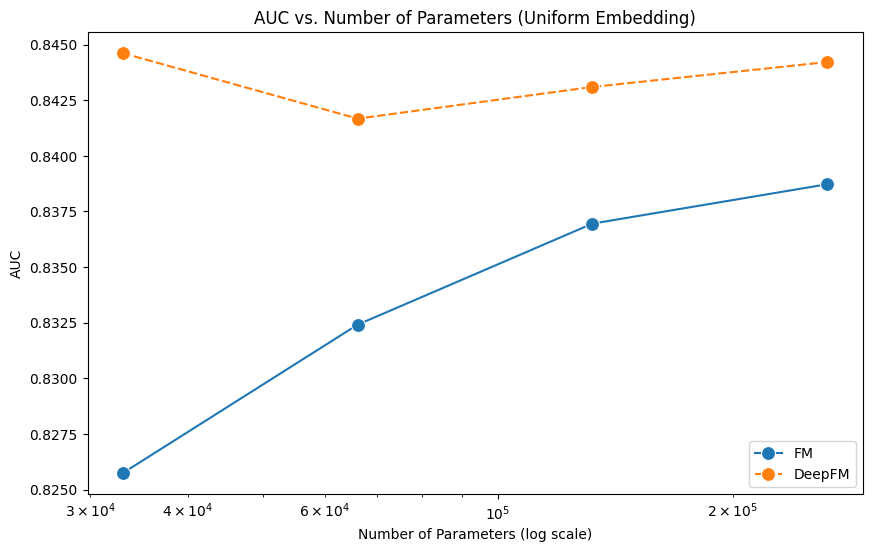

In [14]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load JSON data
with open('./Uniform embedding/tmp/json/best_results_uniformEmbedding_FM.json', 'r') as f:
    data_fm = json.load(f)
with open('./Uniform embedding/tmp/json/best_results_uniformEmbedding_deepfm.json', 'r') as f:
    data_deepfm = json.load(f)

# Extract data_uniform
latent_dims = data_fm['latent_dims']

best_test_results_fm = data_fm['best_test_results']
best_test_results_deepfm = data_deepfm['best_test_results']

n_embedding_parameters_fm = data_fm['n_embedding_parameters']
n_embedding_parameters_deepfm = data_deepfm['n_embedding_parameters']

# Create DataFrames
df_uniform = pd.DataFrame({'latent_dims': latent_dims,
                           'AUC': best_test_results_fm,
                           'n_embedding_parameters': n_embedding_parameters_fm,
                           'Model': 'FM'})

df_deepFM = pd.DataFrame({'latent_dims': latent_dims,
                          'AUC': best_test_results_deepfm,
                          'n_embedding_parameters': n_embedding_parameters_deepfm,
                          'Model': 'DeepFM'})

# Combine DataFrames
df = pd.concat([df_uniform, df_deepFM])

# Plot the data with separate calls for each model (specifying color and marker)
plt.figure(figsize=(10, 6))
sns.lineplot(x='n_embedding_parameters', y='AUC', hue='Model', data=df, style='Model', marker='o', markersize=10)

# Customize the plot
plt.xscale('log')
plt.xlabel('Number of Parameters (log scale)')
plt.ylabel('AUC')
plt.title('AUC vs. Number of Parameters (Uniform Embedding)')

# Re-order legend entries to match line order (optional)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Show the plot
plt.show()

'NVIDIA GeForce RTX 2070'

39